Google App Rating Prediction

Objective : Make a model to predict the app rating, with other information about the app provided.

In [ ]:
Analysis to be done: 
The problem is to identify the apps that are going to be good for Google to promote. 
App ratings, which are provided by the customers, is always a great indicator of the 
goodness of the app. The problem reduces to: predict which apps will have high ratings.

Content: Dataset: Google Play Store data (“googleplaystore.csv”)


In [ ]:
Steps to perform:

Load the data file using pandas. 

Check for null values in the data. 
Get the number of null values for each column.

Drop records with nulls in any of the columns. 

In [2]:
import pandas as pd
df=pd.read_csv("googleplaystore.csv")
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [3]:
df.dropna(inplace=True)
df.isna().sum()


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

Variables seem to have incorrect type and inconsistent formatting. You need to fix them: 

Size column has sizes in Kb as well as Mb. To analyze, you’ll need to convert these to numeric.

Extract the numeric value from the column

Multiply the value by 1,000, if size is mentioned in Mb

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1,Facebook,SOCIAL,4.1,78158306,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
2,Facebook,SOCIAL,4.1,78128208,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
3,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
4,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
5,WhatsApp Messenger,COMMUNICATION,4.4,69109672,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device


In [4]:
df['Size'].value_counts()

Varies with device    1637
14M                    165
12M                    161
11M                    159
15M                    159
                      ... 
930k                     1
306k                     1
122k                     1
676k                     1
683k                     1
Name: Size, Length: 413, dtype: int64

In [6]:
df['Size'].count()

9360

In [7]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [4]:
def change_size(Size):
    if 'M' in Size:
        sizenum=Size[:-1]
        sizenum=float(sizenum)*1000
        return sizenum
df['Size']=df['Size'].map(change_size)



In [10]:
df['Size'].value_counts()

14000.0    165
12000.0    161
15000.0    159
11000.0    159
13000.0    157
          ... 
89000.0      9
84000.0      9
86000.0      8
90000.0      5
1000.0       4
Name: Size, Length: 181, dtype: int64

In [11]:
len(df['Size'])

9360

Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).

In [5]:
df['Reviews']=pd.to_numeric(df['Reviews'])

In [59]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

Installs field is currently stored as string and has values like 1,000,000+. 

Treat 1,000,000+ as 1,000,000

remove ‘+’, ‘,’ from the field, convert it to integer



In [68]:
df['Installs'].value_counts()

1,000,000+        1576
10,000,000+       1252
100,000+          1150
10,000+           1009
5,000,000+         752
1,000+             712
500,000+           537
50,000+            466
5,000+             431
100,000,000+       409
100+               309
50,000,000+        289
500+               201
500,000,000+        72
10+                 69
1,000,000,000+      58
50+                 56
5+                   9
1+                   3
Name: Installs, dtype: int64

In [6]:
def format_Installfield(Installs):
    if '+' in Installs:
        fmtInstall=Installs[:-1]
        buf=''
        for index in range(len(fmtInstall)):
            if ',' not in fmtInstall[index]:
                buf+=fmtInstall[index]
            
        return buf
            
df['Installs']=df['Installs'].map(format_Installfield)
df['Installs']=pd.to_numeric(df['Installs'])


In [70]:
df['Installs'].value_counts()

1000000       1576
10000000      1252
100000        1150
10000         1009
5000000        752
1000           712
500000         537
50000          466
5000           431
100000000      409
100            309
50000000       289
500            201
500000000       72
10              69
1000000000      58
50              56
5                9
1                3
Name: Installs, dtype: int64

Price field is a string and has $ symbol. Remove ‘$’ sign, and convert it to numeric.

In [71]:
df['Price'].value_counts()

0          8715
$2.99       114
$0.99       106
$4.99        70
$1.99        59
           ... 
$389.99       1
$4.84         1
$37.99        1
$1.61         1
$3.04         1
Name: Price, Length: 73, dtype: int64

In [72]:
df['Price'].unique()

array(['0', '$6.99', '$0.99', '$2.99', '$1.99', '$2.49', '$4.99', '$5.99',
       '$4.49', '$9.99', '$3.99', '$1.49', '$3.95', '$7.99', '$3.49',
       '$8.99', '$13.99', '$19.99', '$11.99', '$12.99', '$2.90', '$17.99',
       '$399.99', '$29.99', '$14.99', '$2.95', '$4.77', '$24.99', '$3.90',
       '$2.50', '$3.28', '$1.20', '$2.59', '$9.00', '$1.59', '$1.00',
       '$5.49', '$18.99', '$299.99', '$1.97', '$400.00', '$16.99',
       '$389.99', '$33.99', '$10.00', '$10.99', '$4.84', '$37.99',
       '$1.61', '$4.60', '$79.99', '$4.29', '$1.70', '$1.50', '$1.29',
       '$19.40', '$3.08', '$379.99', '$8.49', '$2.56', '$15.46', '$7.49',
       '$4.59', '$2.00', '$14.00', '$6.49', '$15.99', '$3.88', '$39.99',
       '$3.02', '$1.75', '$1.76', '$3.04'], dtype=object)

In [7]:
df['Price'] = df['Price'].apply((lambda x:str(x).replace('$','') if '$' in str(x) else str(x)))



In [74]:
df['Price'].value_counts()

0         8715
2.99       114
0.99       106
4.99        70
1.99        59
          ... 
389.99       1
4.84         1
37.99        1
1.61         1
3.04         1
Name: Price, Length: 73, dtype: int64

In [91]:
df['Price'].unique()

array(['0', '6.99', '0.99', '2.99', '1.99', '2.49', '4.99', '5.99',
       '4.49', '9.99', '3.99', '1.49', '3.95', '7.99', '3.49', '8.99',
       '13.99', '19.99', '11.99', '12.99', '2.90', '17.99', '399.99',
       '29.99', '14.99', '2.95', '4.77', '24.99', '3.90', '2.50', '3.28',
       '1.20', '2.59', '9.00', '1.59', '1.00', '5.49', '18.99', '299.99',
       '1.97', '400.00', '16.99', '389.99', '33.99', '10.00', '10.99',
       '4.84', '37.99', '1.61', '4.60', '79.99', '4.29', '1.70', '1.50',
       '1.29', '19.40', '3.08', '379.99', '8.49', '2.56', '15.46', '7.49',
       '4.59', '2.00', '14.00', '6.49', '15.99', '3.88', '39.99', '3.02',
       '1.75', '1.76', '3.04'], dtype=object)

In [8]:
df['Price'] = df['Price'].apply (lambda x: float(x))

In [93]:
df['Price'].dtype

dtype('float64')

5. Sanity checks:

Average rating should be between 1 and 5 as only these values are allowed on the play store. Drop the rows that have a value outside this range.

Reviews should not be more than installs as only those who installed can review the app. If there are any such records, drop them.

For free apps (type = “Free”), the price should not be >0. Drop any such rows.

In [75]:
df['Rating'].value_counts()

4.4    1108
4.3    1076
4.5    1037
4.2     951
4.6     823
4.1     707
4.0     567
4.7     499
3.9     386
3.8     303
5.0     274
3.7     239
4.8     234
3.6     174
3.5     163
3.4     128
3.3     102
4.9      87
3.0      83
3.1      69
3.2      63
2.9      45
2.8      42
2.7      25
2.6      25
2.5      21
2.3      20
2.4      19
1.0      16
2.2      14
1.9      13
2.0      12
1.7       8
2.1       8
1.8       8
1.6       4
1.5       3
1.4       3
1.2       1
Name: Rating, dtype: int64

In [76]:
df['Rating'].unique()

array([4.1, 4.4, 4.5, 4. , 4.6, 4.7, 4.3, 4.2, 3.8, 4.8, 3.7, 3.9, 4.9,
       3.3, 3.6, 3.5, 3.4, 2.8, 3.2, 3.1, 3. , 2.9, 2.4, 2.7, 2.5, 1.8,
       2.1, 2. , 1.7, 1.9, 2.2, 2.3, 2.6, 1.6, 5. , 1.5, 1.4, 1.2, 1. ])

In [77]:
df['Reviews'].unique()

array([78158306, 78128208, 69119316, ...,        3,        2,        1])

In [78]:
df['Installs'].unique()

array([1000000000,  100000000,  500000000,   50000000,   10000000,
          5000000,    1000000,     500000,     100000,      50000,
            10000,       5000,       1000,        500,        100,
               10,         50,          5,          1])

In [79]:
print(df['Reviews']>df['Installs'])


1        False
2        False
3        False
4        False
5        False
         ...  
10188    False
10193    False
10197    False
10222    False
10241    False
Length: 9360, dtype: bool


In [80]:
(df['Reviews']>df['Installs']).value_counts()


False    9353
True        7
dtype: int64

In [81]:
df[(df['Reviews']>df['Installs'])]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4261,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,NaN,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
8554,DN Blog,SOCIAL,5.0,20,4200.0,10,Free,0,Teen,Social,"July 23, 2018",1,4.0 and up
8927,Trovami se ci riesci,GAME,5.0,11,6100.0,10,Free,0,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
9185,Brick Breaker BR,GAME,5.0,7,19000.0,5,Free,0,Everyone,Arcade,"July 23, 2018",1,4.1 and up
9454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.0,1,Free,0,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
9803,Ra Ga Ba,GAME,5.0,2,20000.0,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
9967,Mu.F.O.,GAME,5.0,2,16000.0,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1,2.3 and up


In [9]:
df.drop(df[df['Reviews']>df['Installs']].index, inplace = True)

In [95]:
df[(df['Reviews']>df['Installs'])]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [97]:
df[df['Type']=='Free'].value_counts()

App                                                 Category          Rating  Reviews  Size     Installs  Type  Price  Content Rating  Genres                         Last Updated        Current Ver  Android Ver 
Nick                                                ENTERTAINMENT     4.2     123279   25000.0  10000000  Free  0.0    Everyone 10+    Entertainment;Music & Video    January 24, 2018    2.0.8        4.4 and up      4
WatchESPN                                           SPORTS            4.1     288809   6600.0   10000000  Free  0.0    Everyone        Sports                         September 27, 2017  2.5.1        4.4 and up      4
Skyscanner                                          TRAVEL_AND_LOCAL  4.5     481546   29000.0  10000000  Free  0.0    Everyone        Travel & Local                 August 6, 2018      5.48         4.4 and up      4
O-Star                                              DATING            4.4     59       38000.0  5000      Free  0.0    Everyone        Da

In [104]:

df[(df['Type']=='Free') & (df['Price']==0)].value_counts()

App                                                 Category          Rating  Reviews  Size     Installs  Type  Price  Content Rating  Genres                         Last Updated        Current Ver  Android Ver 
Nick                                                ENTERTAINMENT     4.2     123279   25000.0  10000000  Free  0.0    Everyone 10+    Entertainment;Music & Video    January 24, 2018    2.0.8        4.4 and up      4
WatchESPN                                           SPORTS            4.1     288809   6600.0   10000000  Free  0.0    Everyone        Sports                         September 27, 2017  2.5.1        4.4 and up      4
Skyscanner                                          TRAVEL_AND_LOCAL  4.5     481546   29000.0  10000000  Free  0.0    Everyone        Travel & Local                 August 6, 2018      5.48         4.4 and up      4
O-Star                                              DATING            4.4     59       38000.0  5000      Free  0.0    Everyone        Da

In [105]:
df[(df['Type']=='Free')& (df['Price'] ==0)].shape[0]

8711

In [106]:
df[(df['Type']=='Free')& (df['Price'] >0)].shape[0]

0

5. Performing univariate analysis: 

Boxplot for Price

Are there any outliers? Think about the price of usual apps on Play Store.

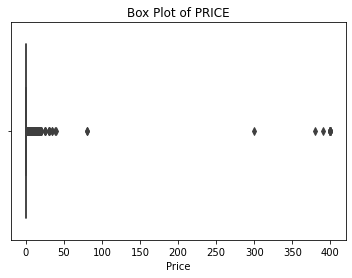

In [115]:
import seaborn as sb
sb.boxplot(x= 'Price',data= df).set(title="Box Plot of PRICE");

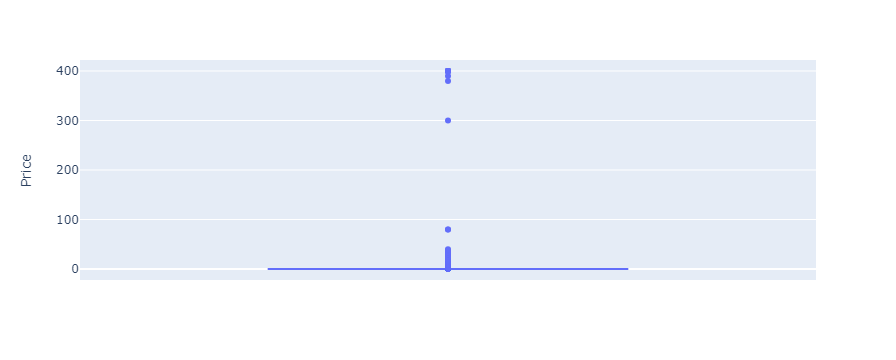

In [110]:
import plotly.express as px
fig = px.box(df, y='Price')

fig.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f832a2c34f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f832a2c3a30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f832a2c3250>],
 'medians': [<matplotlib.lines.Line2D at 0x7f832a2c3f70>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f832a2ec250>],
 'means': []}

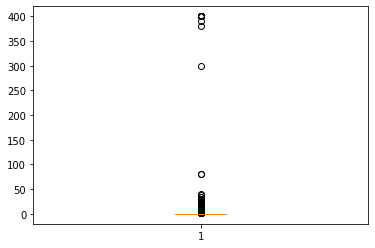

In [113]:
import matplotlib.pyplot as plt

%matplotlib inline  

plt.boxplot(df.Price)


In [114]:
df['Price'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

0.0      0.0
0.1      0.0
0.2      0.0
0.3      0.0
0.4      0.0
0.5      0.0
0.6      0.0
0.7      0.0
0.8      0.0
0.9      0.0
1.0    400.0
Name: Price, dtype: float64

In [116]:
df['Price'].describe()

count    9353.000000
mean        0.961467
std        15.827539
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

In [125]:
import numpy as np
def detect_outlier(data):
    data1=sorted(data,reverse=True)
    q1,q3=np.percentile(data1,[25,75])
    iqr=q3-q1
    print(iqr)
    lower=q1-(1.5*iqr)
    upper=q3+(1.5*iqr)
    print(lower)
    print(upper)
    outliers=data[(data<lower) | (data > upper)]
    print(outliers)
detect_outlier(df['Price'])

0.0
0.0
0.0
416       6.99
417       6.99
1144      0.99
1236      6.99
1675      2.99
         ...  
10107    19.99
10123     1.49
10133     3.49
10136     3.04
10155     4.99
Name: Price, Length: 642, dtype: float64


In [ ]:
Boxplot for Reviews

Are there any apps with very high number of reviews? Do the values seem right?

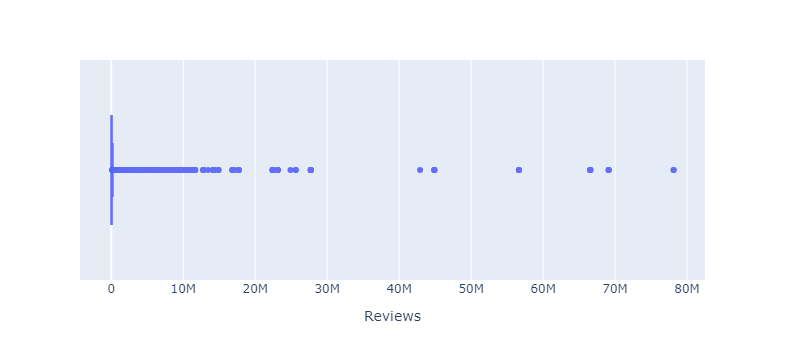

In [126]:
fig = px.box(df, x='Reviews')

fig.show()

In [129]:
import numpy as np
def detect_outlier(data):
    q1,q3=np.percentile(data,[25,75])
    iqr=q3-q1
    print("iqr= " + str(iqr))
    lower=q1-(1.5*iqr)
    upper=q3+(1.5*iqr)
    print("lower= "+str(lower))
    print("upper= "+str(upper))
    outliers=data[(data<lower) | (data > upper)]
    print(outliers)
detect_outlier(df['Reviews'])

iqr= 81560.0
lower= -122153.0
upper= 204087.0
1       78158306
2       78128208
3       69119316
4       69119316
5       69109672
          ...   
1630      205803
1631      205739
1632      205299
1633      205299
1634      205191
Name: Reviews, Length: 1634, dtype: int64


Histogram for Size

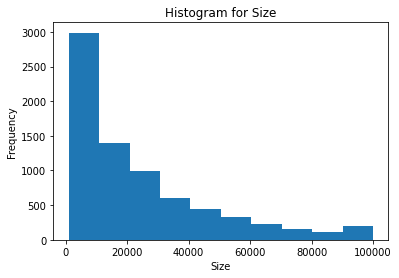

In [130]:
df['Size'].plot(kind='hist')
plt.title('Histogram for Size')
plt.xlabel('Size')
plt.show()


Size seems to be distributed towards the lower end. 
(i.e) bigger sizes are lesser in count.

In [ ]:
Histogram for Rating

How are the ratings distributed? Is it more toward higher ratings?

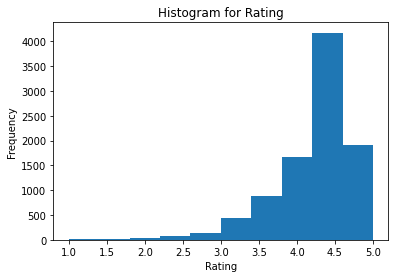

In [131]:
df['Rating'].plot(kind='hist')
plt.title('Histogram for Rating')
plt.xlabel('Rating')
plt.show()

Rating seems to be more distributed towards the upper boundary. 
(i.e) lower rating are very less.

Outlier treatment: 

Price: From the box plot, it seems like there are some apps with very high price. A price of $200 for an application on the Play Store is very high and suspicious!

Check out the records with very high price
Is 200 indeed a high price?
Drop these as most seem to be junk apps

In [132]:
df[df['Price']>200].index.shape[0] #we can use either to get the results
df.loc[df['Price']>200].shape[0]


15

In [10]:
df.drop(df[df['Price']>200].index, inplace= True)

In [134]:
df.shape

(9338, 13)

Reviews: Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and, in fact, will skew it. Drop records having more than 2 million reviews.

In [135]:
#II) Very few apps have very high no. of Reviews
df.loc[df['Reviews']>2000000].shape[0]


453

In [11]:
df.drop(df[df['Reviews']>2000000].index, inplace= True)
df.shape



(8885, 13)

Installs:  There seems to be some outliers in this field too. Apps having very high number of installs should be dropped from the analysis.
Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99
Decide a threshold as cutoff for outlier and drop records having values more than that

In [137]:
#Find out the Percentiles of Installs and decide a threshold as cutoff for outlier
df.quantile([0.1,0.25,0.5,0.7,0.9,0.95,0.99], axis=0)


,Rating,Reviews,Size,Installs,Price
0.10,3.5,18.00,3000.0,1000.0,0.00
0.25,4.0,159.00,5700.0,10000.0,0.00
0.50,4.3,4290.00,15000.0,500000.0,0.00
0.70,4.5,35930.40,27000.0,1000000.0,0.00
0.90,4.7,296771.00,56000.0,10000000.0,0.00
0.95,4.8,637298.00,73000.0,10000000.0,1.99
0.99,5.0,1462800.88,96000.0,100000000.0,7.49


In [12]:
df.drop(df[df['Installs']>10000000].index, inplace= True)

In [139]:
df.shape

(8496, 13)

7.Bivariate analysis: 
Let’s look at how the available predictors relate to the variable of interest, i.e., our target variable rating. Make scatter plots (for numeric features) and box plots (for character features) to assess the relations between rating and the other features.
1.Make scatter plot/joinplot for Rating vs. Price
What pattern do you observe? Does rating increase with price?

<AxesSubplot: xlabel='Rating', ylabel='Price'>

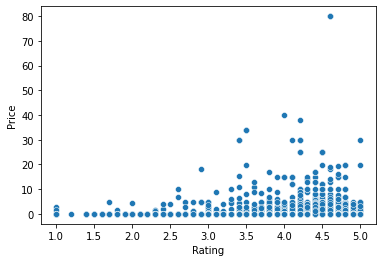

In [140]:
sb.scatterplot(x = 'Rating', y = 'Price',data=df)

In [ ]:
As rating increases, price does not constantly increase (i.e) it increases variably.
Both the plots show a positive linear relationship; as the price of an app increases 
its rating also increases. 
That states the paid apps have the highest of Ratings

<AxesSubplot: xlabel='Rating', ylabel='Price'>

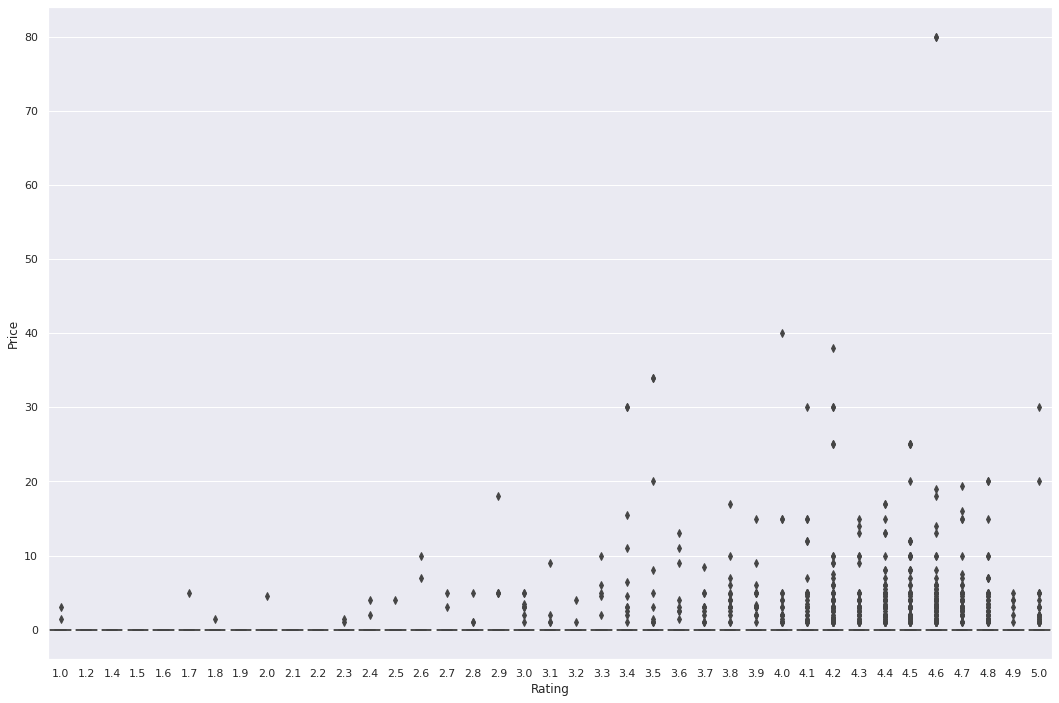

In [176]:
sb.boxplot(x="Rating",y="Price",data=df)

In [ ]:
Make scatter plot/joinplot for Rating vs. Size

Are heavier apps rated better?


<AxesSubplot: xlabel='Rating', ylabel='Size'>

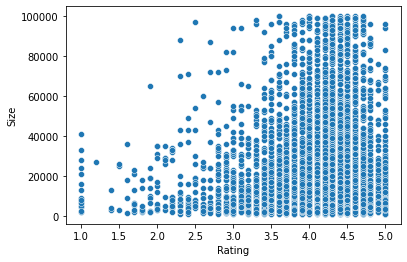

In [141]:
sb.scatterplot(x = 'Rating', y = 'Size',data=df)

In [ ]:
As rating increases, size also increases and becomes constant.
The plots show a positive linear relationship; as the 
Size, increases the Ratings increases. This stats the heavier apps 
are rated better.

Make scatter plot/joinplot for Rating vs. Reviews

Does more review mean a better rating always?


<AxesSubplot: xlabel='Rating', ylabel='Reviews'>

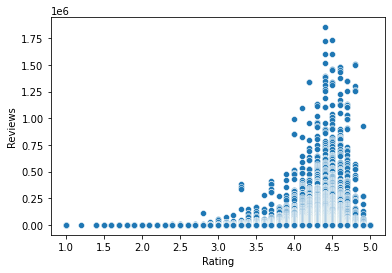

In [142]:
sb.scatterplot(x = 'Rating', y = 'Reviews',data=df)

In [ ]:
As rating increases, reviews does not constantly increase (i.e) it increases variably.
The plot shows a positive linear relationship between Ratings and Reviews. 
More reviews mean better ratings indeed.


Make boxplot for Rating vs. Content Rating

Is there any difference in the ratings? Are some types liked better?

In [143]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

<AxesSubplot: xlabel='Rating', ylabel='Content Rating'>

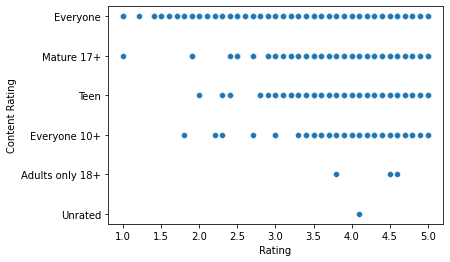

In [144]:
sb.scatterplot(x = 'Rating', y = 'Content Rating',data=df)

The above plot shows the apps for Everyone is worst rated as it contain the highest number of outliers followed by apps for Mature 17+ and Everyone 10+ , followed by Teen category. The catergory Adults only 18+ is rated better and the most liked type.

Make boxplot for Ratings vs. Category

Which genre has the best ratings?

For each of the plots above, note down your observation.

<AxesSubplot: xlabel='Rating', ylabel='Category'>

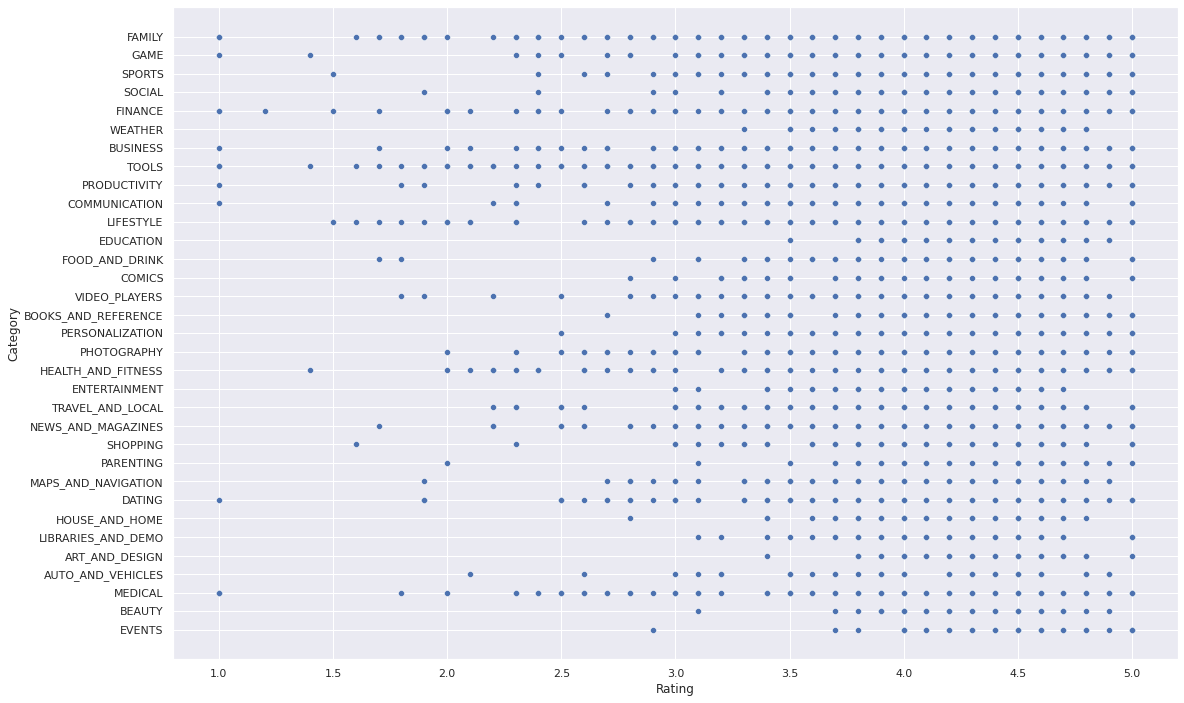

In [146]:
sb.set(rc={'figure.figsize':(18,12)})
sb.scatterplot(x = 'Rating', y = 'Category',data=df)

From the above plot the Category Events has the best Ratings out of all other app genres

8. Data preprocessing

For the steps below, create a copy of the dataframe to make all the edits. Name it inp1.
Reviews and Install have some values that are still relatively very high. 
Before building a linear regression model, you need to reduce the skew. 
Apply log transformation (np.log1p) to Reviews and Installs.

In [13]:
#creating a copy of the data(df) to make all edits
inp1= df.copy()
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
471,The Tribez: Build a Village,FAMILY,4.4,1852384,NaN,10000000,Free,0.0,Everyone,Simulation,"July 13, 2018",9.3.6,4.0.3 and up
482,FRONTLINE COMMANDO: D-DAY,GAME,4.5,1736105,14000.0,10000000,Free,0.0,Mature 17+,Action,"May 16, 2014",3.0.4,2.1 and up
485,PES 2018 PRO EVOLUTION SOCCER,SPORTS,4.4,1721943,26000.0,10000000,Free,0.0,Everyone,Sports,"June 27, 2018",2.3.2,5.0 and up
496,Real Basketball,SPORTS,4.5,1605267,NaN,10000000,Free,0.0,Everyone,Sports,"December 5, 2016",Varies with device,Varies with device
497,Call of Duty®: Heroes,GAME,4.4,1604146,57000.0,10000000,Free,0.0,Teen,Action,"June 27, 2018",4.8.0,4.1 and up


In [148]:
inp1.skew()

/tmp/ipykernel_70/3545313420.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Rating      -1.749753
Reviews      4.576494
Size         1.510450
Installs     1.543697
Price       16.264811
dtype: float64

In [15]:
# apply log transformation to Reviews
import numpy as np
reviews_skew = np.log1p(inp1['Reviews'])
inp1['Reviews']= reviews_skew
reviews_skew.skew()

-0.20039949659264

In [16]:
Installs_skew = np.log1p(inp1['Installs'])
inp1['Installs']


471      10000000
482      10000000
485      10000000
496      10000000
497      10000000
           ...   
10188         100
10193          10
10197         100
10222          10
10241          10
Name: Installs, Length: 8496, dtype: int64

In [151]:
Installs_skew.skew()

-0.5097286542754779

In [17]:
#Dropping the columns- App, Last Updated, Current Ver, Type, & Andriod Ver as these won't be useful for our model
inp1.drop(['App','Last Updated','Current Ver','Android Ver','Type'], axis= 1, inplace = True)


In [153]:
inp1.head()

,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres
471,FAMILY,4.4,14.431985,NaN,10000000,0.0,Everyone,Simulation
482,GAME,4.5,14.367155,14000.0,10000000,0.0,Mature 17+,Action
485,SPORTS,4.4,14.358964,26000.0,10000000,0.0,Everyone,Sports
496,SPORTS,4.5,14.288801,NaN,10000000,0.0,Everyone,Sports
497,GAME,4.4,14.288103,57000.0,10000000,0.0,Teen,Action


In [154]:
inp1.shape

(8496, 8)

In [18]:
inp2=inp1

In [156]:
inp2.head()

,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres
471,FAMILY,4.4,14.431985,NaN,10000000,0.0,Everyone,Simulation
482,GAME,4.5,14.367155,14000.0,10000000,0.0,Mature 17+,Action
485,SPORTS,4.4,14.358964,26000.0,10000000,0.0,Everyone,Sports
496,SPORTS,4.5,14.288801,NaN,10000000,0.0,Everyone,Sports
497,GAME,4.4,14.288103,57000.0,10000000,0.0,Teen,Action


Get dummy columns for Category, Genres, and Content Rating. This needs to be done as the models do not understand categorical data, and all data should be numeric. Dummy encoding is one way to convert character fields to numeric. Name of dataframe should be inp2.

In [158]:
inp2['Category'].unique()

array(['FAMILY', 'GAME', 'SPORTS', 'SOCIAL', 'FINANCE', 'WEATHER',
       'BUSINESS', 'TOOLS', 'PRODUCTIVITY', 'COMMUNICATION', 'LIFESTYLE',
       'EDUCATION', 'FOOD_AND_DRINK', 'COMICS', 'VIDEO_PLAYERS',
       'BOOKS_AND_REFERENCE', 'PERSONALIZATION', 'PHOTOGRAPHY',
       'HEALTH_AND_FITNESS', 'ENTERTAINMENT', 'TRAVEL_AND_LOCAL',
       'NEWS_AND_MAGAZINES', 'SHOPPING', 'PARENTING',
       'MAPS_AND_NAVIGATION', 'DATING', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'ART_AND_DESIGN', 'AUTO_AND_VEHICLES',
       'MEDICAL', 'BEAUTY', 'EVENTS'], dtype=object)

In [19]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
inp2.Category = label_encoder.fit_transform(inp2.Category)
inp2.Category

471      11
482      14
485      28
496      28
497      14
         ..
10188    11
10193    10
10197    25
10222     4
10241    14
Name: Category, Length: 8496, dtype: int64

In [162]:
inp2['Genres']

471         Simulation
482             Action
485             Sports
496             Sports
497             Action
             ...      
10188    Entertainment
10193           Events
10197     Productivity
10222         Business
10241           Racing
Name: Genres, Length: 8496, dtype: object

In [163]:
inp2['Genres'].unique()

array(['Simulation', 'Action', 'Sports', 'Social', 'Role Playing',
       'Casual', 'Sports;Action & Adventure', 'Entertainment', 'Finance',
       'Puzzle', 'Weather', 'Strategy', 'Business', 'Tools',
       'Productivity', 'Communication', 'Lifestyle', 'Card', 'Education',
       'Adventure', 'Food & Drink', 'Comics', 'Video Players & Editors',
       'Books & Reference', 'Card;Action & Adventure', 'Personalization',
       'Photography', 'Health & Fitness', 'Music', 'Arcade',
       'Travel & Local', 'Word', 'News & Magazines', 'Shopping',
       'Parenting', 'Puzzle;Brain Games', 'Maps & Navigation', 'Racing',
       'Casino', 'Simulation;Action & Adventure',
       'Role Playing;Action & Adventure', 'Educational;Pretend Play',
       'Action;Action & Adventure', 'Racing;Action & Adventure', 'Dating',
       'Arcade;Action & Adventure', 'House & Home',
       'Entertainment;Creativity', 'Casual;Pretend Play',
       'Casual;Action & Adventure', 'Board', 'Tools;Education',
       'L

In [20]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
inp2.Genres = label_encoder.fit_transform(inp2.Genres)
inp2.Genres

471      94
482       0
485      99
496      99
497       0
         ..
10188    50
10193    57
10197    80
10222    20
10241    86
Name: Genres, Length: 8496, dtype: int64

In [165]:
inp2['Content Rating'].unique()

array(['Everyone', 'Mature 17+', 'Teen', 'Everyone 10+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [21]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
inp2['Content Rating'] = label_encoder.fit_transform(inp2['Content Rating'])
inp2['Content Rating']

471      1
482      3
485      1
496      1
497      4
        ..
10188    4
10193    1
10197    1
10222    1
10241    1
Name: Content Rating, Length: 8496, dtype: int64

In [168]:
inp2.columns

Index(['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Price',
       'Content Rating', 'Genres'],
      dtype='object')

In [169]:
inp2.head()

,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres
471,11,4.4,14.431985,NaN,10000000,0.0,1,94
482,14,4.5,14.367155,14000.0,10000000,0.0,3,0
485,28,4.4,14.358964,26000.0,10000000,0.0,1,99
496,28,4.5,14.288801,NaN,10000000,0.0,1,99
497,14,4.4,14.288103,57000.0,10000000,0.0,4,0


In [170]:
inp2.shape

(8496, 8)

Train test split  and apply 70-30 split. Name the new dataframes df_train and df_test.

In [22]:
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error as mse
from sklearn import metrics


In [30]:
#Creating the variable X and Y which contains the X features as independent features 
#and Y is the target feature 
df2 = inp2
X = df2.drop('Rating',axis=1)
newX=X.fillna(0)
y = df2['Rating']
#Dividing the X and y into test and train data
X_train, X_test, y_train, y_test = tts(newX,y, test_size=0.3, random_state=5)
newX


,Category,Reviews,Size,Installs,Price,Content Rating,Genres
471,11,14.431985,0.0,10000000,0.0,1,94
482,14,14.367155,14000.0,10000000,0.0,3,0
485,28,14.358964,26000.0,10000000,0.0,1,99
496,28,14.288801,0.0,10000000,0.0,1,99
497,14,14.288103,57000.0,10000000,0.0,4,0
...,...,...,...,...,...,...,...
10188,11,0.693147,5800.0,100,0.0,4,50
10193,10,0.693147,0.0,10,0.0,1,57
10197,25,0.693147,4200.0,100,0.0,1,80
10222,4,0.693147,3500.0,10,0.0,1,20


In [31]:
lin_reggressor = LR()
lin_reggressor.fit(X_train,y_train)


LinearRegression()

In [32]:
R2_Score_train_data = round(lin_reggressor.score(X_train,y_train),3)
print("The R2 value of the Training Set is : {}".format(R2_Score_train_data))


The R2 value of the Training Set is : 0.038


In [33]:
y_pred = lin_reggressor.predict(X_test)
R2_Score_test_data =metrics.r2_score(y_test,y_pred)
R2_Score_test_data


0.037386613033964844

In [34]:
R2_Score_test_data = round(lin_reggressor.score(X_test,y_test),3)
print("The R2 value of the Training Set is : {}".format(R2_Score_test_data))


The R2 value of the Training Set is : 0.037


In [ ]:
************************************************************************************************************************************************